In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Wanyika_cleaned.csv')

In [4]:
df.head()

,Mean Chronology (Calibrated BP - 1950),Wild Terrestrial Fauna,Avian Fauna,Aquatic Fauna,Indet. Bones,Bovids,Cattle (Bos taurus/indicus),Sheep/Goat (Ovis/Capra Indet.),Iron Smelting,Iron Use,...,drycoastalwoodedgrassland,drynorthernwoodedgrassland,drysouthernwoodedgrassland,forest/wood/grasslandmosaic,montaneforest,comoros,kenya,madagascar,rwanda,tanzania
0,1470.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1475.5,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,1562.5,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1608.5,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1193.5,1,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [8]:
y = df['Mean Chronology  (Calibrated BP - 1950) ']
X = df.drop(columns=['Mean Chronology  (Calibrated BP - 1950) '])

In [10]:
y

0       1470.0
1       1475.5
2       1562.5
3       1608.5
4       1193.5
         ...  
1787     595.0
1788     607.5
1789     615.0
1790     607.0
1791     625.5
Name: Mean Chronology  (Calibrated BP - 1950) , Length: 1792, dtype: float64

In [14]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor

k_folds = KFold(n_splits=4, shuffle=True, random_state=0)

K = range(1,20)
scores = []


for k in K:
    # Create Decision Tree classifier object
    dt_clf = RandomForestRegressor(max_depth=k, random_state=0, n_estimators=200)

    # Train Decision Tree Classifier on our data
    score = cross_val_score(dt_clf, X, y, scoring='neg_mean_absolute_error', cv = k_folds).mean()
    scores.append(score)

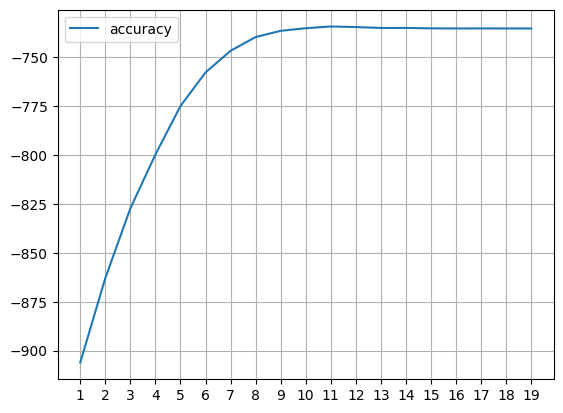

In [15]:
plt.plot(K, scores, label="accuracy")
plt.xticks(ticks=K)
plt.grid()
plt.legend()

In [55]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(n_estimators=100, contamination=0.00115, random_state=0)
pred = iso_forest.fit_predict(X)

In [56]:
np.where(pred == -1)

(array([1081, 1082, 1083]),)